# **Linear Dimensionality Reduction**
Author: Dayne N. Fradejas 
---



In [1]:
from time import time
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

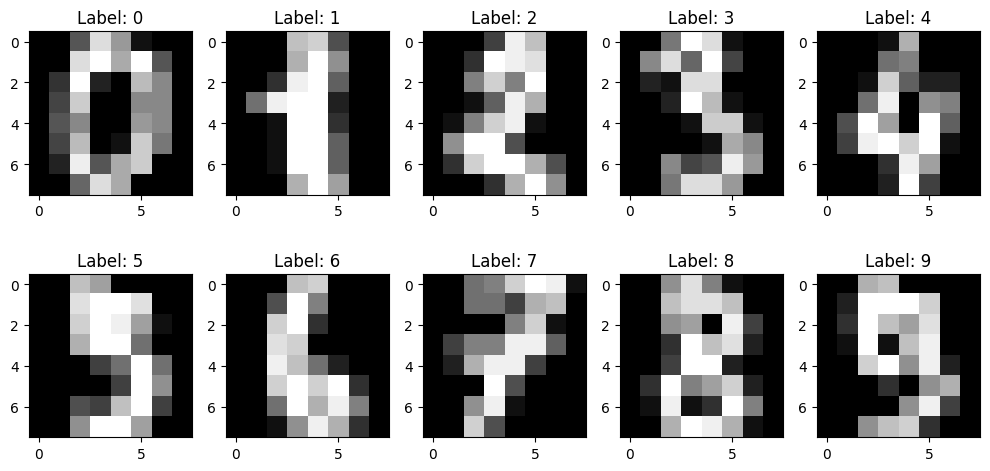

In [2]:
# Load data sets
digits = datasets.load_digits()

# Plot the first 10 images and their labels
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i in range(10):
    ax = axs[i // 5, i % 5]
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
plt.tight_layout()
plt.show()


Explained variance ratio:    [0.14890594 0.13618771]
Cumulative percent variance: [14.89059358 28.50936482]


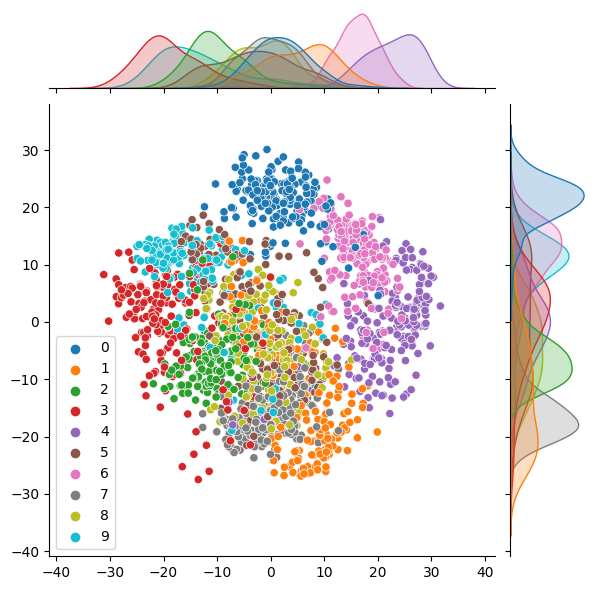

In [3]:
import pandas as pd
import seaborn as sns

# store data in a variable
X, y = digits.data, digits.target

# set the number of personal components
n_comp = 2

# Perform Standard Scaling then PCA
pca = PCA(n_components=n_comp)
X_pca = pca.fit(X).transform(X)
var = pca.explained_variance_ratio_
print("Explained variance ratio:    %s" % str(var))
print("Cumulative percent variance: %s" % str(np.cumsum(var)*100))

sns.jointplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=digits.target, palette='tab10')
plt.show()


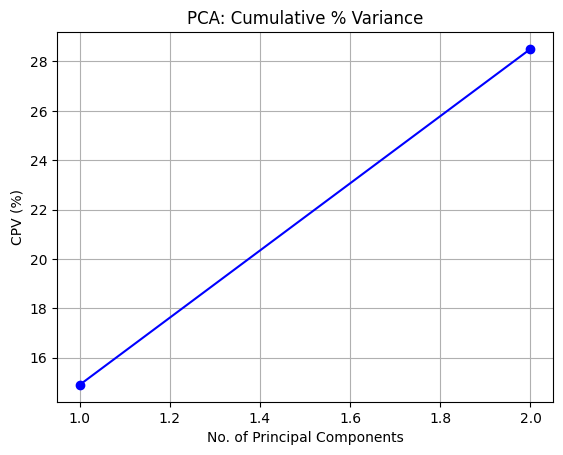

CPV at 2 PCs: 28.50936482369708%


In [4]:
# Perform PCA to view the CPV plot
var = pca.explained_variance_ratio_
cpv = np.cumsum(var)*100
plt.plot(np.arange(cpv.size)+1,cpv,'bo-')
plt.title('PCA: Cumulative % Variance')
plt.xlabel('No. of Principal Components')
plt.ylabel('CPV (%)')
plt.grid()
plt.show()

# Perform PCA to get only the top n_comp PCs
X_pca = pca.fit(X).transform(X)

print(f"CPV at {n_comp} PCs: {100*np.sum(pca.explained_variance_ratio_)}%")

b. Split Data

In [5]:
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [6]:
# Split the data to 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y,
                                                    test_size=0.3, 
                                                    random_state = 0,
                                                    stratify=y)

print(X_train.shape)
print(X_test.shape)

(1257, 2)
(540, 2)


In [ ]:
# Specify the grid: parameters and values
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid']} 

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

start = time()
grid_search.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_["params"])))

# Print best parameters after tuning
print(grid_search.best_params_)
  
# Print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

grid_predictions = grid_search.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

cfm = confusion_matrix(y_test, grid_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = np.arange(0,10))
cm_display.plot()
plt.title('Test Data: Confusion Matrix')
plt.show()

Train Data Accuracy: 0.753381
Test Data Accuracy: 0.611111


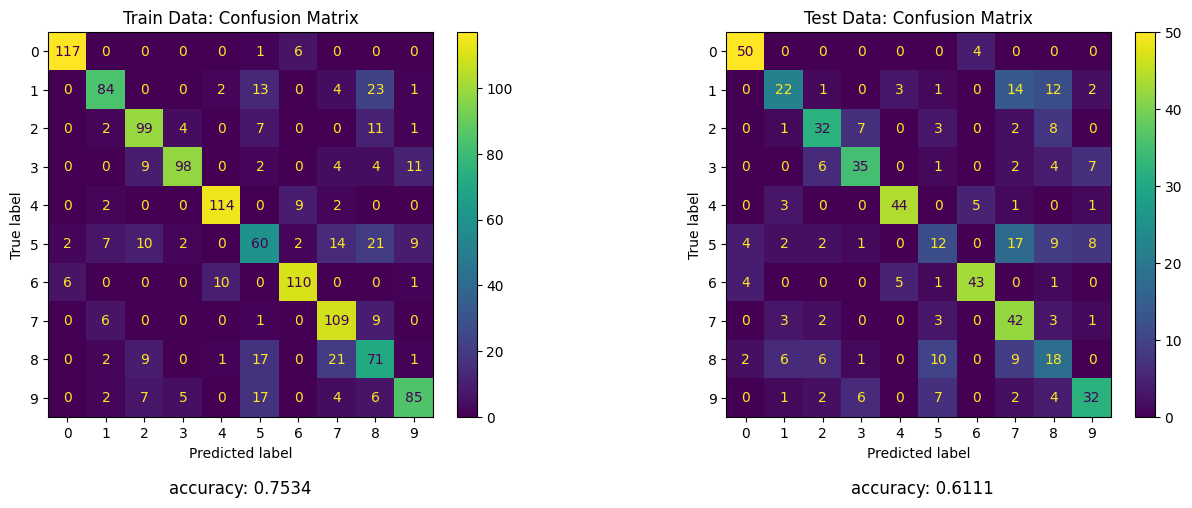

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train Data Accuracy
model = make_pipeline(SVC(gamma=0.1, C=5, kernel='rbf')).fit(X_train,y_train)

train_R1 = model.score(X_train, y_train)
test_R1 = model.score(X_test, y_test)

# prediction results
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Test Data Accuracy 
print("Train Data Accuracy: {:.6f}".format(train_R1))
print("Test Data Accuracy: {:.6f}".format(test_R1))

# Plot the confusion matrices side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

cfm1 = confusion_matrix(y_train, y_train_pred)
cm1 = ConfusionMatrixDisplay(confusion_matrix = cfm1, display_labels =  np.arange(0,10))

cfm2 = confusion_matrix(y_test, y_test_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix = cfm2, display_labels =  np.arange(0,10))

# Plot the first confusion matrix
cm1.plot(ax=axs[0])
axs[0].set_title('Train Data: Confusion Matrix')
axs[0].text(0.5, -0.20, "accuracy: {:.4f}".format(train_R1), size=12, ha='center', transform=axs[0].transAxes)

# Plot the second confusion matrix
cm2.plot(ax=axs[1])
axs[1].set_title('Test Data: Confusion Matrix')
axs[1].text(2.27, -0.20, "accuracy: {:.4f}".format(test_R1), size=12, ha='center', transform=axs[0].transAxes)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

## **Using LDA**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# store data in a variable
X, y = digits.data, digits.target

# set the number of personal components
n_comp = 2

# Perform Standard Scaling then PCA
lda = LDA(n_components=n_comp)
X_lda = pca.fit(X).transform(X)
var = lda.explained_variance_ratio_
print("Explained variance ratio:    %s" % str(var))
print("Cumulative percent variance: %s" % str(np.cumsum(var)*100))

sns.jointplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=digits.target, palette='tab10')
plt.show()
